![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [17]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

**Import data**

In [18]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here

In [19]:
# Print out First 5 rows from dataframe
# Your code here
retail=pd.read_csv("https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv",encoding = "ISO-8859-1")

In [20]:
# Print out brief info
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [21]:
retail.shape

(541909, 8)

In [22]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [23]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [24]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
retail.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [26]:
# Your code here
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [85]:
retail.dropna(axis=1,how='all', inplace=True)

**Examine few examples of NaN values**

In [86]:
# List all NaN values
retail[(retail['Description'].isnull()) | (retail['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceHour
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00,2010,12,11
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2010,12,14
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2010,12,14
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,2010,12,14
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,2010,12,14
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94,2010,12,14
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2010,12,14
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.30,2010,12,14
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,3.87,2010,12,14
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.73,2010,12,14


**Exclude negative Quatity entries**

In [28]:
#before changing
retail[retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


In [30]:
#delete
retail=retail[~retail['Quantity']<0]

In [31]:
#after changing
retail[retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [32]:
#before changing
retail[retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


In [35]:
#delete row
retail=retail[~(retail['UnitPrice']<0)]

In [36]:
#after changing
retail[retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [52]:
# Your code here
CustomerUK=retail[retail['Country']=='United Kingdom']
df=CustomerUK.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(1)
print("The customerID is {} with the highest number of order is {} ".format(df.index[0], df.iloc[0]) )

The customerID is 12748.0 with the highest number of order is 210 


**The customer with the highest money spent on purchases comes from Netherlands**

In [53]:
# Your code here
#ở đây em có 2 cách hiểu :một là tìm người có tổng hóa đơn mua hàng cao nhất,(một người có thể có nhiều hóa đơn mua hàng)
#                         hai là tìm người sở hữu hóa đơn mua hàng cao nhất
#em làm bài này theo cách hiểu thứ 2

In [55]:
retail['TotalAmount']=retail['Quantity']*retail['UnitPrice']
df=retail[retail['Country']=='Netherlands'].groupby('InvoiceNo').sum()['TotalAmount'].sort_values(ascending=False)
df

InvoiceNo
572035    20277.92
563076    19150.66
548011    15719.56
552883    14415.74
562789    12341.21
544479    11956.10
581175    10901.54
541206    10389.06
567280    10267.88
558262    10174.94
554827     8980.88
539731     8520.92
566557     8281.12
575508     8111.20
541711     8060.30
578140     7952.68
541570     7722.04
564650     6429.64
544480     6323.38
557263     5683.06
567290     5350.40
573003     4992.00
573002     4534.22
572051     4311.48
574056     3949.66
555164     3623.20
544672     3211.70
558311     2739.92
548010     2527.94
572123     2314.48
            ...   
552846      288.00
552885      270.00
581338      250.60
547365      235.71
576664      232.50
578082      221.36
542894      214.45
536403      192.60
566173      186.56
570191      171.93
577326      166.00
575709      162.80
577474      158.24
555003      158.10
562790      157.50
547825      155.65
557328      154.67
542720      134.48
579528      119.00
546433      117.93
569665       91.85
57

In [56]:
index=df.index[0]
name=retail[retail['InvoiceNo']==index]['CustomerID'].unique()
print("-->The customer with the highest money spent on purchases comes from Netherlands have CusTomerID is: ",name[0])

-->The customer with the highest money spent on purchases comes from Netherlands have CusTomerID is:  14646.0


**On which year had the highest sales?**

In [58]:
# Your code here
from datetime import datetime
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])

In [59]:
retail['InvoiceYear']=retail['InvoiceDate'].dt.year
retail['InvoiceMonth']=retail['InvoiceDate'].dt.month

In [62]:
df=retail.groupby('InvoiceYear').sum()['TotalAmount'].sort_values(ascending=False)

In [64]:
print('The year had the highest sales is ', df.index[0])

The year had the highest sales is  2011


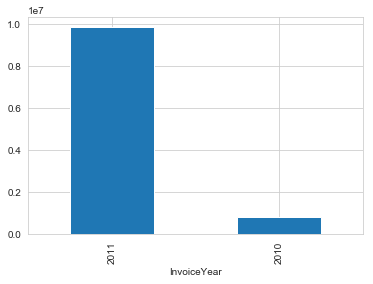

In [65]:
df.plot(kind='bar')

**How many orders (per hour)?**

In [66]:
#each invoice has one invoiceDate
retail['InvoiceHour']=retail['InvoiceDate'].dt.hour

In [67]:
print('--> Thống kê theo giờ')
print(retail.groupby('InvoiceNo')['InvoiceHour'].unique().value_counts())
#không hiểu sao tự nhiên xuất hiện giờ [11,12] trong khi 
print(retail['InvoiceHour'].unique())

--> Thống kê theo giờ
[12]        3322
[13]        2818
[14]        2555
[15]        2474
[11]        2472
[10]        2431
[9]         1538
[16]        1406
[17]         738
[8]          568
[18]         209
[19]         146
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: InvoiceHour, dtype: int64
[ 8  9 10 11 12 13 14 15 16 17  7 18 19 20  6]


**Make a plot about number of orders per hour**

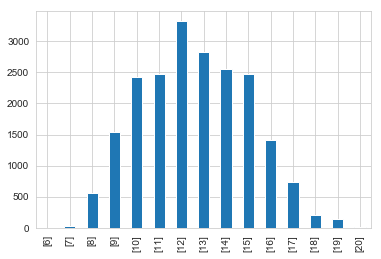

In [71]:
#Make a plot about number of orders per hour
retail.groupby('InvoiceNo')['InvoiceHour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar')

**How many orders (per month)?**

In [70]:
#How many orders (per month)?
retail.groupby('InvoiceNo')['InvoiceMonth'].unique().value_counts()

[11]    2884
[12]    2468
[10]    2129
[9]     1896
[5]     1731
[6]     1576
[7]     1540
[3]     1531
[8]     1407
[4]     1318
[2]     1126
[1]     1120
Name: InvoiceMonth, dtype: int64

**Make a plot about number of orders per month**

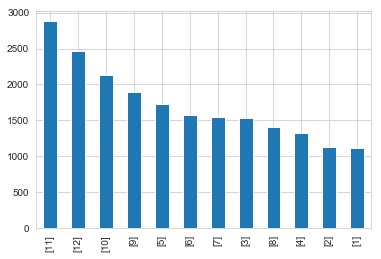

In [72]:
#Make a plot about number of orders per month
retail.groupby('InvoiceNo')['InvoiceMonth'].unique().value_counts().plot(kind='bar')

**Top 10 items most sales**

In [74]:
#Top 10 items most sales
df=retail['StockCode'].value_counts().head(10)
df

85123A    2270
85099B    2115
22423     2019
47566     1707
20725     1595
84879     1489
22197     1426
22720     1401
21212     1370
20727     1328
Name: StockCode, dtype: int64

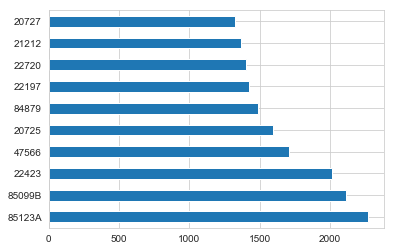

In [76]:
df.plot(kind='barh')

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [77]:
# Your code here
retail_exceptUK=retail[retail['Country']!='United Kingdom']
retail_exceptUK['Country'].value_counts()
# What can you tell about this?

Germany                 9042
France                  8408
EIRE                    7894
Spain                   2485
Netherlands             2363
Belgium                 2031
Switzerland             1967
Portugal                1501
Australia               1185
Norway                  1072
Italy                    758
Channel Islands          748
Finland                  685
Cyprus                   614
Sweden                   451
Unspecified              446
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   295
Hong Kong                284
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       58
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic

In [79]:
print('--> 10 countries that have the most "Quantity" order is :')
df=retail_exceptUK.groupby('InvoiceNo')['Country'].unique().value_counts().head(10)
df

--> 10 countries that have the most "Quantity" order is :


[Germany]        457
[France]         392
[EIRE]           288
[Belgium]         98
[Netherlands]     95
[Spain]           90
[Portugal]        58
[Australia]       57
[Switzerland]     54
[Finland]         41
Name: Country, dtype: int64

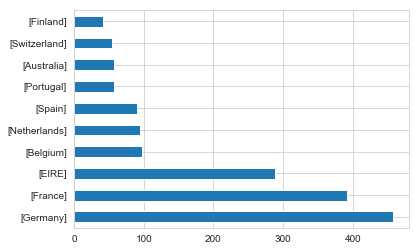

In [80]:
df.plot('barh')

### You are awesome!!